In [1]:
!pip install folium

from main import main

path = "nmea_LOG.txt"
file = open(path, "r")

results = main(file)

In [2]:
# altitude map (red is high altitude, green is low altitude)
results['altitude_map']

In [3]:
# speed map (red is high speed, green is low speed)
results['speed_map']

In [4]:
# snr map (snr was constant)
results['snr_map']

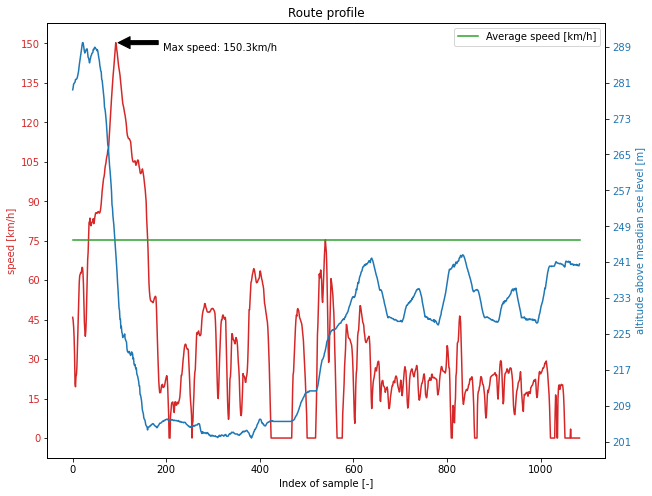

In [5]:
import matplotlib.pyplot as plt
import math
import time
import numpy as np

# make sure we are working with floats and not strings
speeds = [float(s) for s in results['speeds']]
altitudes = [float(s) for s in results['altitudes']]

divisions_count = 10

def make_y_axis_readable(steps_cnt, values):
    min_v = math.floor(min(values))
    max_v = math.ceil(max(values))
    diff = max_v - min_v
    step = math.floor(diff / steps_cnt)

    res = list(range(min_v, max_v, step))
    return res, [min_v, max_v]

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.title.set_text('Route profile')

# speed vs position
color = 'tab:red'
ax1.set_xlabel('Index of sample [-]')
ax1.set_ylabel('speed [km/h]', color=color)
yarr, minmax_v = make_y_axis_readable(divisions_count, speeds)
ax1.plot(range(0, len(speeds)), speeds, color=color, label="Speed [km/h]")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yticks(yarr)

# add max speed marker
xmax = speeds.index(max(speeds))
ymax = max(speeds)
ax1.annotate('Max speed: ' + str(ymax) + "km/h", 
             xy=(xmax, ymax), 
             xytext=(xmax + 100, ymax - 3),
             arrowprops=dict(facecolor='black', shrink=0.05)
            )

ax2 = ax1.twinx() 

# altitude vs position
color = 'tab:blue'
ax2.set_ylabel('altitude above meadian see level [m]', color=color)
ax2.tick_params(axis='y', labelcolor=color)
yarr, minmax_v = make_y_axis_readable(divisions_count, altitudes)
ax2.plot(range(0, len(altitudes)), altitudes, color=color, label="Altitude [m]")
ax2.set_yticks(yarr)

# add average speed
average_speed = sum(speeds)/len(speeds)

ax3 = ax1.twinx()
color = 'tab:green'
ax3.plot([0, len(speeds)], [average_speed, average_speed], color=color, label="Average speed [km/h]")
ax3.axes.get_yaxis().set_visible(False)

# add legend and show
plt.legend(loc="upper right")
plt.show()

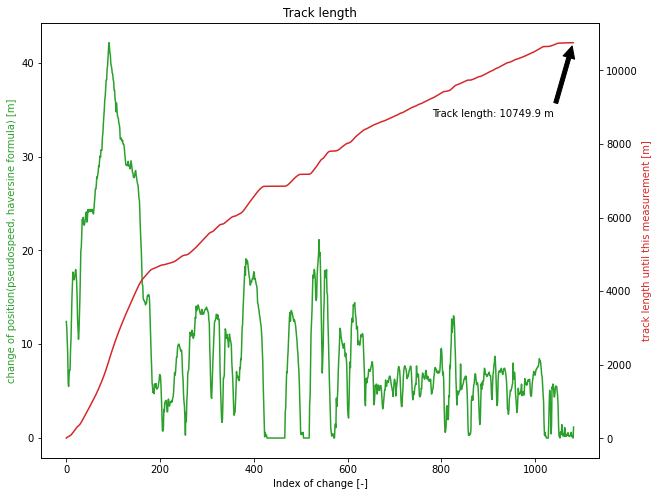

In [6]:
delta_track_lengths = [float(s) for s in results['track_length'][1]]
track_length = results['track_length'][0]

fig2, ax4 = plt.subplots(figsize=(10, 8))
ax4.title.set_text('Track length')

# create cummulative track length (each )
cummulative_track = [delta_track_lengths[0]]
for i in range(1, len(delta_track_lengths)-1):
    cummulative_track.append(cummulative_track[i-1] + delta_track_lengths[i])

# add chagne of position
color = 'tab:green'
ax4.set_ylabel('change of position(pseudospeed, haversine formula) [m]', color=color)
ax4.set_xlabel('Index of change [-]')
ax4.plot(range(0, len(delta_track_lengths)), delta_track_lengths, color=color, label="Delta lengths(pseudospeed) [m]")

ax5 = ax4.twinx()

# add track length marker
xmax = len(cummulative_track) - 1
ymax = cummulative_track[len(cummulative_track) - 1]

# track length marker
ax5.annotate('Track length: ' + str(math.floor(ymax*100)/100) + " m", 
             xy=(xmax, ymax), 
             xytext=(xmax - 300, ymax - 2000),
             arrowprops=dict(facecolor='black', shrink=0.05)
            )

# add cumulative track length
color = 'tab:red'
ax5.set_ylabel('track length until this measurement [m]', color=color)
ax5.plot(range(0, len(cummulative_track)), cummulative_track, color=color, label="Delta lengths(pseudospeed) [m]")

plt.show()